In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 5 ##

## Census ##

In [5]:
full = Table.read_table('nc-est2019-agesex-res.csv')

NameError: name 'Table' is not defined

In [3]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')

In [4]:
# Make things easier to read
simple = partial.relabeled(2, '2014').relabeled(3, '2019')
simple

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


## Line Plots ##

In [5]:
# Remove the age totals
no_999 = simple.where('AGE', are.below(999))

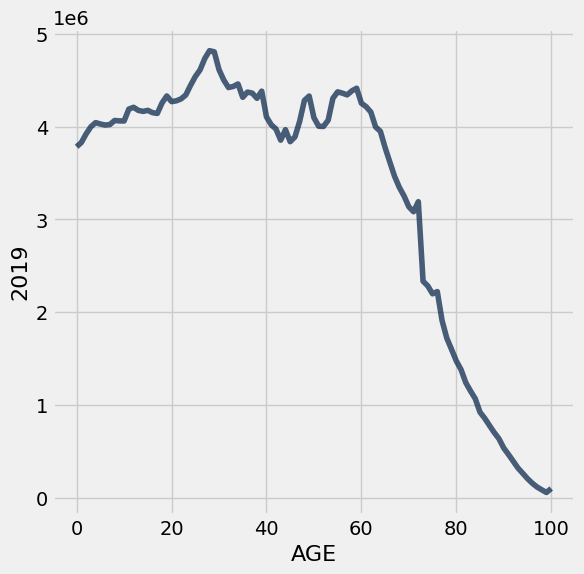

In [6]:
# Our first chart!
overall = no_999.where('SEX', 0)
overall.plot('AGE', '2019')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

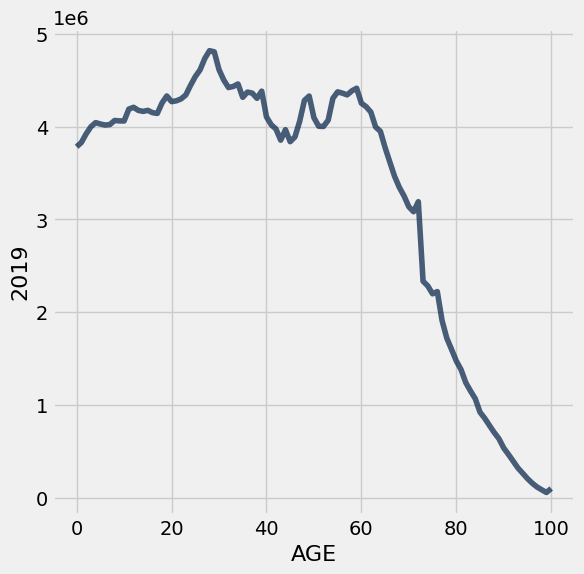

In [7]:
# US Population  <--- Just add a comment

overall.plot('AGE', '2019')

US Population


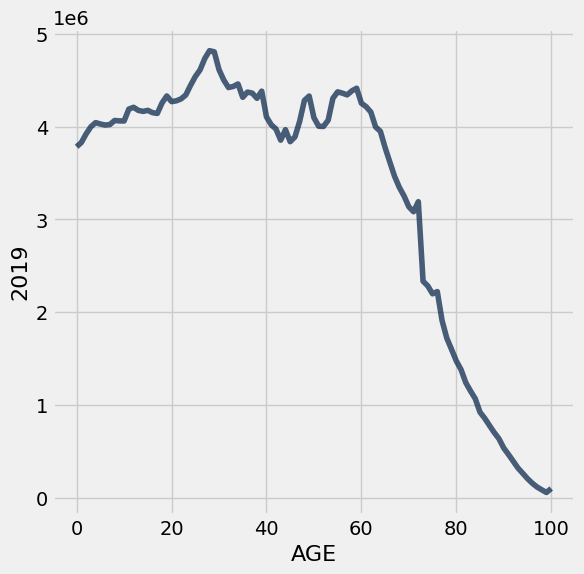

In [8]:
overall.plot('AGE', '2019')
print('US Population')  # <--- Print out what it is

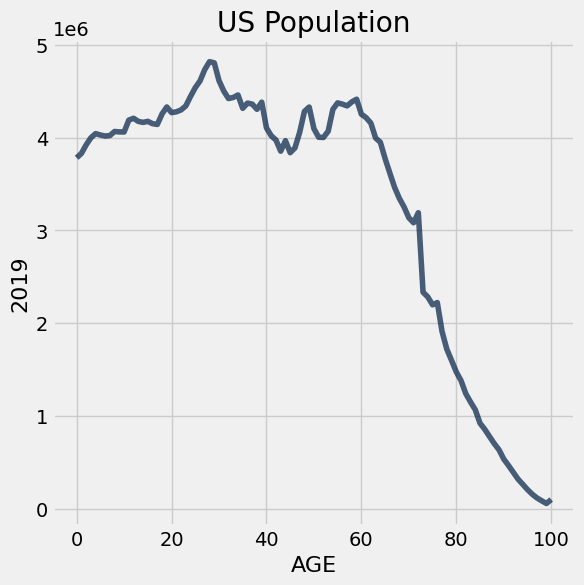

In [9]:
overall.plot('AGE', '2019')
plots.title('US Population');    # <--- OPTIONAL; not needed for Data 8

## Males vs Females

In [10]:
# Let's compare male and female counts per age
males = no_999.where('SEX', 1).drop('SEX')
females = no_999.where('SEX', 2).drop('SEX')

In [11]:
pop_2019 = Table().with_columns(
    'Age', males.column('AGE'),
    'Males', males.column('2019'),
    'Females', females.column('2019')
)
pop_2019

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372
5,2061200,1967081
6,2052956,1964271
7,2055735,1966584
8,2079723,1986471
9,2073148,1988726


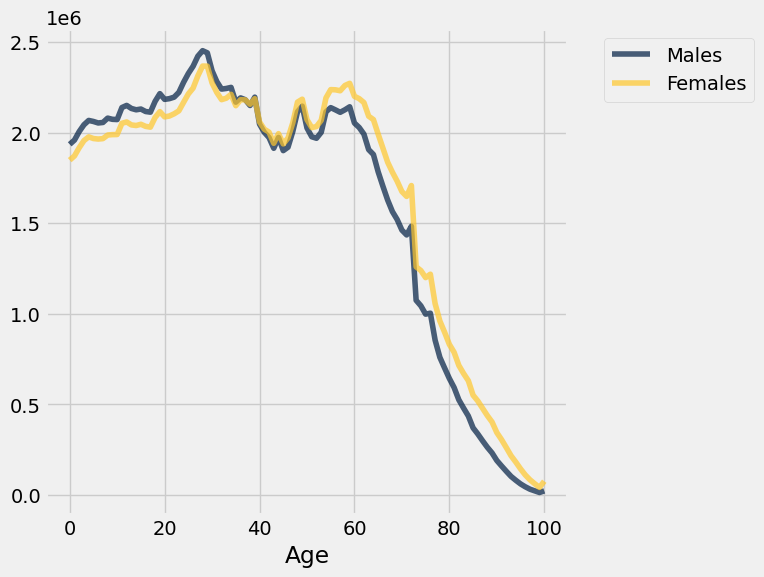

In [12]:
pop_2019.plot('Age')

In [13]:
# Calculate the percent female for each age
total = pop_2019.column('Males') + pop_2019.column('Females')
pct_female = pop_2019.column('Females') / total * 100
pct_female

array([ 48.84772929,  48.85665575,  48.86482661,  48.90769794,
        48.87989409,  48.83177216,  48.89619133,  48.891796  ,
        48.85332574,  48.96079987,  48.98279709,  48.9638626 ,
        48.91584353,  48.91319525,  48.95759569,  48.99435008,
        49.0132324 ,  49.00202176,  48.95504446,  48.85543937,
        48.86882703,  48.87982978,  48.93202059,  48.82680386,
        48.75770556,  48.75912579,  48.69284051,  48.8521968 ,
        49.12023409,  49.23570746,  49.27026013,  49.32986637,
        49.3410954 ,  49.39558621,  49.56983336,  49.77550276,
        49.88230838,  49.98809984,  50.07964091,  49.90289454,
        50.14599374,  50.21453868,  50.37201166,  50.35627549,
        50.26558532,  50.48105622,  50.6527532 ,  50.58644103,
        50.62378332,  50.44245948,  50.55924807,  50.63152682,
        50.80644073,  50.81350976,  50.89171017,  51.13603295,
        51.27000222,  51.3678543 ,  51.52798838,  51.46621264,
        51.73196183,  51.88924675,  52.0955001 ,  52.30

In [14]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.848,  48.857,  48.865,  48.908,  48.88 ,  48.832,  48.896,
        48.892,  48.853,  48.961,  48.983,  48.964,  48.916,  48.913,
        48.958,  48.994,  49.013,  49.002,  48.955,  48.855,  48.869,
        48.88 ,  48.932,  48.827,  48.758,  48.759,  48.693,  48.852,
        49.12 ,  49.236,  49.27 ,  49.33 ,  49.341,  49.396,  49.57 ,
        49.776,  49.882,  49.988,  50.08 ,  49.903,  50.146,  50.215,
        50.372,  50.356,  50.266,  50.481,  50.653,  50.586,  50.624,
        50.442,  50.559,  50.632,  50.806,  50.814,  50.892,  51.136,
        51.27 ,  51.368,  51.528,  51.466,  51.732,  51.889,  52.096,
        52.307,  52.436,  52.752,  52.906,  53.012,  53.246,  53.251,
        53.387,  53.443,  53.519,  53.96 ,  54.261,  54.583,  54.837,
        55.269,  55.825,  56.165,  56.372,  57.035,  57.645,  58.29 ,
        59.117,  59.773,  60.625,  61.505,  62.424,  63.419,  64.354,
        65.55 ,  66.583,  67.762,  69.012,  70.064,  70.758,  72.12 ,
        72.672,  74.

In [15]:
# Add female percent to our table
pop_2019 = pop_2019.with_column('Percent female', pct_female)
pop_2019

Age,Males,Females,Percent female
0,1935117,1847935,48.848
1,1958585,1871014,48.857
2,2005544,1916500,48.865
3,2043010,1955655,48.908
4,2066951,1976372,48.88
5,2061200,1967081,48.832
6,2052956,1964271,48.896
7,2055735,1966584,48.892
8,2079723,1986471,48.853
9,2073148,1988726,48.961


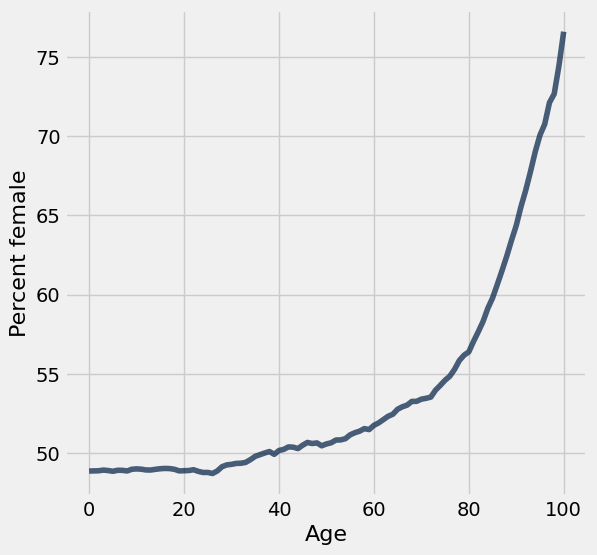

In [16]:
pop_2019.plot('Age', 'Percent female')

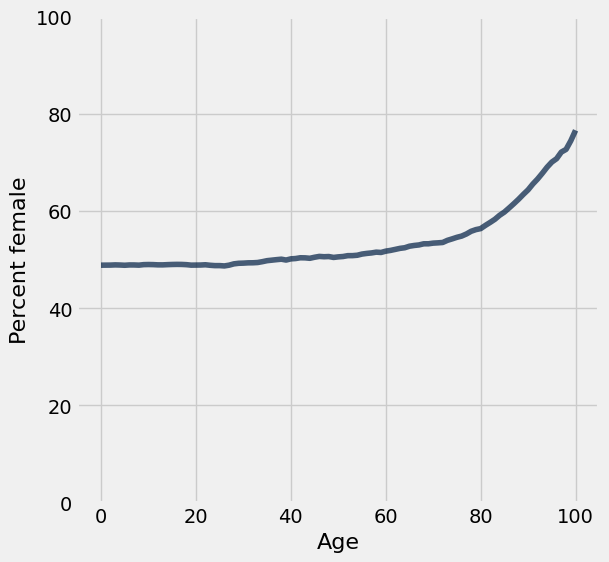

In [17]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think

pop_2019.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for Data 8

## Scatter Plots ##

In [18]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


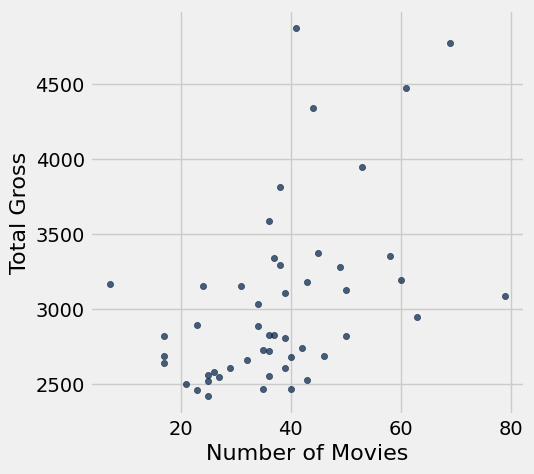

In [19]:
actors.scatter('Number of Movies', 'Total Gross')

In [1]:
actors.scatter('Number of Movies', 'Average per Movie')

NameError: name 'actors' is not defined

In [2]:
actors.where('Average per Movie', are.above(400))

NameError: name 'actors' is not defined

## Bar Charts ##

In [4]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

NameError: name 'Table' is not defined

In [3]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

NameError: name 'top_movies' is not defined

In [ ]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

In [ ]:
top10_adjusted.barh('Title', 'Millions')

Exercise: Generate the chart shown in the slides: a bar chart of age (# years since release) for the 10 highest grossing movies (non-adjusted).